# Transcript Sentiment Analysis

Scripts consist of two components- 
#### action 
and
#### dialogue
Analyzing just the transcript rather than the whole script allows us to focus on the sentiment of dialogues (and therefore, the characters) rather than relying on cues provided by action (i.e., screen direction).

In this notebook, the transcripts of the pilot (i.e., first) episodes of 10 English TV shows of the 'workplace comedy' genre are analyzed to observe the styles across shows and identify considerably similar/different shows. Some of the top shows in this genre that were released between 2001 and 2016 were included in the analysis.

Note 1: Although web scraping to obtain these scripts was attempted initially, the non-uniformity across scripts and lack of availability from a single source prevented a streamlined implementation.
The transcripts were obtained as scripts from various sources and the "action" components were manually omitted to ensure "dialogue" presence alone.

Note 2: Initial sentiment analysis was performed on the scripts rather than transcripts. However, the presence of several "action" statements that conveyed both emotion and information considerably affected the results. The script and transcript of the same show could exhibit greatly varying subjectivity and polarity. Hence, it seemed more advisable to stick to transcripts instead.

In [1]:
#List of shows for which scripts are present in pilots folder
#This list has to be in alphabetical order and as per text file name because it gets stored that way during later analysis

#For full script
#shows=['30 rock','B99','Its always sunny','Mindy project','Parks and rec','Party down','Scrubs','Silicon valley','Superstore','The office','Veep']

#For transcript
shows=['30 rock','B99','Its always sunny','Mindy project','Parks and rec','The office','Scrubs','Silicon valley','Superstore','Veep']

## Storing scripts from text files into a dictionary
To work on the script for each show, a dictionary with the key as show name and value as the text from the script's text file is created. Initial data cleaning includes eliminating neline characters.

In [2]:
'''Want to automate extraction of text from text file so that we dont have to go file-wise'''
import re

my_dict = {}
for i, sh in enumerate(shows):
     #with open("pilots/" + sh + " .txt", "r", encoding="utf-8") as file:
    with open("pilots/" + sh + " transcript.txt", "r", encoding="utf-8") as file:
        text=file.read()
        #replace newline characters with space (because character name and dialogue shouldnt get fused together)
        text=text.replace("\n"," ")
        #replace weird quotation marks, ellipsis
        text = re.sub('[‘’“”…]', '', text)
        #save the script as value to corresponding show in the dictionary
        my_dict[sh]=text
        file.close()
         
my_dict.keys()  

dict_keys(['30 rock', 'B99', 'Its always sunny', 'Mindy project', 'Parks and rec', 'The office', 'Scrubs', 'Silicon valley', 'Superstore', 'Veep'])

In [3]:
#see what a script looks like
my_dict['Superstore']

'Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love?  Amy: That\'s actually a cubic zirconia knockoff. It\'s called PlastiClear. Bo: What happened to the $8 ones? Amy: We\'re all sold out of those, sorry. But this one\'s only $2 more. Bo: I get it. You advertise the cheap jewelry to get the suckers in the door, then you push the expensive stuff. Amy: Well, I wouldn\'t use the word "suckers" or "expensive" or "jewelry". Bo: Fine. I got to stand in line for cigarettes anyhow. Amy: Great. I hope you and your fiance are very happy together. And that you don\'t procreate. Glenn? Glenn: Huh? Amy: I\'m taking a mental-health break.  Glenn: Okay. Have fun now. Reflect.  Dina: Just checking over your new hire forms. American citizen. Nice. No dependents. Me neither, unless you count my birds. It just doesn\'t say anywhere on here if you\'ve 

## Additional Data Cleaning
Observing the data after initial cleaning reveals scope for additional cleaning, such as replacing dollar signs and removing any pieces of text between round or square brackets (which are usually used to indicate the action component in scripts, whereas we want to focus on the dialogue alone.)

In [5]:
## Some more cleaning

#The single quotation mark is getting a \ before it as can be seen above. So we clean it below such that its back to ' form
text=''
for key, val in my_dict.items():
    text=str(my_dict.get(key))
    #use text variable as LHS and RHS (not my_dict[key] as LHS) in all substitutions otherwise edits wont carry forward
    text = re.sub('[‘’“”…]', '', text)
    '''Text within 2 dollar signs renders in italics. 
    To avoid this, replacing symbol with word 'dollar'''
    text = re.sub('\$', 'dollar ', text)
    text = re.sub("[\(\[].*?[\)\]]", "", text) #remove text within square or round brackets
    text = re.sub('\(.*?\)', '', text)
    my_dict[key]=text
    print(my_dict[key])

MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy.  GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You think there's two lines and we all chose to be in this one and you're the only genius who got in the other line? Do you believe this guy? LISA  What are you doing?! He screws you over and now you're lining up behind him? Lisa down. LISA  Will not one of you stand with me?! GUY Hey, shut up-- What kind do you want? Shut up?!! Lisa is now at the front of her line, boiling mad. COUNTER GIRL Can I help you? LISA Yeah, Teli take everything. I want every bagel in this place. I'm buying all the bagels.  A

In [6]:
# We are going to change the individual sentence-wise scripts to key: show name, value: script in string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(str(list_of_text)) #have to use str() otherwise errors in parsing text
    return combined_text

# Bind the contents of each script together and store combined form into dictionary
data_combined = {key: [combine_text(value)] for (key, value) in my_dict.items()}
data_combined['Superstore']

['Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love?  Amy: That\'s actually a cubic zirconia knockoff. It\'s called PlastiClear. Bo: What happened to the dollar 8 ones? Amy: We\'re all sold out of those, sorry. But this one\'s only dollar 2 more. Bo: I get it. You advertise the cheap jewelry to get the suckers in the door, then you push the expensive stuff. Amy: Well, I wouldn\'t use the word "suckers" or "expensive" or "jewelry". Bo: Fine. I got to stand in line for cigarettes anyhow. Amy: Great. I hope you and your fiance are very happy together. And that you don\'t procreate. Glenn? Glenn: Huh? Amy: I\'m taking a mental-health break.  Glenn: Okay. Have fun now. Reflect.  Dina: Just checking over your new hire forms. American citizen. Nice. No dependents. Me neither, unless you count my birds. It just doesn\'t say anywhere on her

In [7]:
# We can put the dictionary into a pandas dataframe
import pandas as pd
#for displaying below
pd.set_option('max_colwidth',500)
#transpose() allows saving the script for each show in row-wise fashion
data_df = pd.DataFrame.from_dict(data_combined).transpose()
#Name the column containing script
data_df.columns = ['Script']
data_df = data_df.sort_index()
data_df

,Script
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You..."
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A..."
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC..."
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front of a boy askin..."
Parks and rec,"LESLIE I love politics. I've always loved politics. ""The game."" LESLIE Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Leslie Knope. And I am ..."
Scrubs,"J.D Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing... .. ..."
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HEAD Goddamn, Thomas, thats a buttload of code. JIAN YANG Sheee-it, mother fucker you can like buy compression software. You dont have to fucking write that shit. You can buy that shit! BIG HEAD Or download a bootleg. THOMAS None of that CodeAcademy crap for my web site. The whole idea of Pied Piper is based on melody recognition..."
Superstore,"Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love? Amy: That's actually a cubic zirconia knockoff. It's called PlastiClear. Bo: What happened to the dollar 8 ones? Amy: We're all sold out of those, sorry. But this one's only dollar 2 more. Bo: I get it. You advertise the chea

# Analyzing sentiment

Sentiment of the scripts is analyzed in terms of 
### polarity
and 
### subjectivity
using the textblob library.

In [8]:
# Create quick lambda functions to find the polarity and subjectivity of each script
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_df['polarity'] = data_df['Script'].apply(pol)
data_df['subjectivity'] = data_df['Script'].apply(sub)
data_df

,Script,polarity,subjectivity
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You...",0.142119,0.525155
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A...",0.169035,0.519843
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC...",0.174016,0.562299
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front of a boy askin...",0.155281,0.577888
Parks and rec,"LESLIE I love politics. I've always loved politics. ""The game."" LESLIE Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Leslie Knope. And I am ...",0.114829,0.528405
Scrubs,"J.D Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing... .. ...",0.088812,0.522610
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HEAD Goddamn, Thomas, thats a buttload of code. JIAN YANG Sheee-it, mother fucker you can like buy compression software. You dont have to fucking write that shit. You can buy that shit! BIG HEAD Or download a bootleg. THOMAS None of that CodeAcademy crap for my web site. The whole idea of Pied Piper is based on melody recognition...",0.076869,0.495912
Superstore,"Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are you looking for friendship? Or solitude? Or even love? Amy: That's actually a cubic zirconia knockoff. It's called PlastiClear. Bo: 

In [9]:
#Add a column with show names for displaying in sentiment graph scatter plot
#This list has to be in alphabetical order because it gets stored that way during later analysis
#full_show_names=['30 Rock','Brooklyn Nine Nine','Brooklyn Nine Nine_Transcript_Only','Its Always Sunny in Philadelphia','The Mindy Project','Parks and Recreation','Party Down','Scrubs','Silicon Valley','Superstore','Superstore_Transcript_Only','The Office','Veep']
full_show_names=['30 Rock','Brooklyn Nine Nine','Its Always Sunny in Philadelphia','The Mindy Project','Parks and Recreation','Scrubs','Silicon valley','Superstore','The Office','Veep']
data_df['Show_name']=full_show_names
data_df

,Script,polarity,subjectivity,Show_name
30 rock,"MOM 1 I nursed Zach til he was 22 months... LISA Excuse me... MOM 2 Weren't you worried about nipple confusion? LISA Excuse me... MOM 1 No. He went right from my breast toa sippy cup. LISA That happened to me once. Can I get by? MOM 2 What about silicone nipple shields? MOM 1 If you had kids, you would not be laughing! LISA Whoa, whoa. Excuse me. There's a line, buddy. GUY There's two lines. LISA No, what? No. There's one line, we're in it. GUY I don't think so. LISA You don't think so? You...",0.142119,0.525155,30 Rock
B99,"JAKE: This job is eating me alive. I can't breathe anymore. I spent all these years trying to be the good guy, the man in the white hat. I'm not becoming like them. I am them. AMY: Hey! What are you doing, weirdo? JAKE: I'm doing the best speech from Donnie Brasco. Or actually, ten of me are doing the best speech from Donnie Brasco. 'Sup? AMY: Get it together, man. Okay? AMY: So the store was hit about two hours ago. They took mostly tablets, laptops, and cameras. JAKE: Sorry. A...",0.169035,0.519843,Brooklyn Nine Nine
Its always sunny,"DENNIS Another big night, fellas. One Hundred eighty four dollars and sixty-seven cents. MAC Jesus Christ. CHARLIE On a Thursday night? DENNIS And our mortgage is due in two weeks. MAC Didn't we just pay that goddamn thing like a week ago? DENNIS Yes, Mac. And a week ago we were three weeks late. CHARLIE What are we gonna do? DENNIS I don't know, Charlie. But, then again, I don't know why I got into business with you boners in the first place, so I'm probably not the right person to ask. MAC...",0.174016,0.562299,Its Always Sunny in Philadelphia
Mindy project,"Mindy: You have an idea of how your life is going to turn out. When I was a kid, all I did was watch romantic comedies in our living room while I did my homework. ""I'll have what she's having."" Some coffee or, you know, drinks? Mindy: In High School, Tom Hanks was my first boyfriend. ""For as long as we both shall live."" Mindy: In college, everything changed. No supervision, total freedom. I could watch romantic comedies whenever I wanted to. ""I'm just a girl standing in front of a boy askin...",0.155281,0.577888,The Mindy Project
Parks and rec,"LESLIE I love politics. I've always loved politics. ""The game."" LESLIE Some people say that politics is show business for ugly people. I disagree. It's show business for real people -- people whose talents aren't dancing and singing, but rather talking and talking. LESLIE I just...I love the majesty of the political system. I live for it. I would say that my greatest dream is to be elected President of the United States of America. LESLIE My name is Leslie Knope. And I am ...",0.114829,0.528405,Parks and Recreation
Scrubs,"J.D Since I was eleven years old, I've been able to sleep through anything. Storms, earthquakes, my girlfriend yelling at me to ""Open the door or we're through, you name it. J.D Last night I didn't sleep. I guess I get a little goofy when I'm nervous. You see, today isn't just any other day.. It's my first day. I'm the man. J.D And four years of pre-med, four years of med school, and hundreds of thousands of dollars in unpaid loans have finally made me realize one important thing... .. ...",0.088812,0.522610,Scrubs
Silicon valley,"BIG HEAD Hey, man, some guys from Zynga are throwing an all-night Perplexus tourney. Maybe we can find some Stanford kids to hustle. THOMAS Cant. BIG HEAD Goddamn, Thomas, thats a buttload of code. JIAN YANG Sheee-it, mother fucker you can like buy compression software. You dont have to fucking write that shit. You can buy that shit! BIG HEAD Or download a bootleg. THOMAS None of that CodeAcademy crap for my web site. The whole idea of Pied Piper is based on melody recognition...",0.076869,0.495912,Silicon valley
Superstore,"Narrator: The American superstore. One-stop shopping for everything you could ever want or need. Do you want to be thinner? Fatter? Happier? Sadder? Are y

# Visualizing polarity-subjectivity results

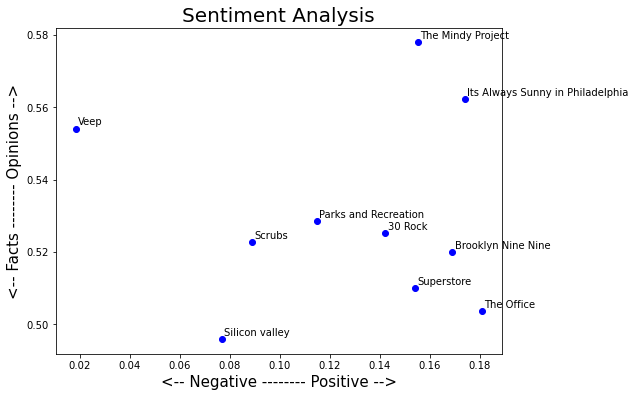

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

for index, show in enumerate(data_df.index):
    x = data_df.polarity.loc[show]
    y = data_df.subjectivity.loc[show]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_df['Show_name'][index], fontsize=10)
    #plt.xlim(-.01, .12) 

   
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Analysis of script polarity & subjectivity

## Polarity (measured along X-axis; range: -1 to 1)
1. Veep is the most negative show compared to all the others here. Surprisingly, The Office and Its Always Sunny in Philadelphia (IASIP) are the most positive ones, even though these shows do not involve particularly cheerful characters or themes. Looks like they tried to stay positive at least in the pilot episode! 
2. Notably, none of the shows exhibit negativity < 0. This makes sense because they are comedies, so its unlikely for circumstances to get dark enough for considerable negativity. 
3. There are some shows that exhibit similar levels of positivity- Superstore and The Mindy Project (TMP) are almost equally positive, as are Brooklyn Nine Nine and IASIP.

## Subjectivity (measured along Y-axis; range: 0 to 1)
1. The characters in The Mindy Project (TMP) primarily express themselves via opinions instead of facts (as a viewer, can confirm :)). Next in line in this regard are Veep and IASIP (again, as a viewer, can confirm).
2. Almost all the other shows tend toward fact-based expression. Silicon Valley seems to have the most fact-based narrative style (the characters are often describing how a product works or who owns which company, which falls in the facts territory).
3. Parks and Recreation, Scrubs and 30 Rock exhibit very similar levels of facts. That's an interesting insight because all three are based on wildly different environments (a government office, a hospital, and an improv show, respectively). Based on my preferences, it looks like I enjoy shows where the characters have a relatively fact-based manner of speaking. Shows taht are too fact-based or too-opinion based may not be likable for me.

## Overall
1. All shows exhibit small levels of positivity (0.01 to 0.18), in a range between 0 to 1. This means that even though they are comedies, they dont have wildly cheerful dialogue. This makes sense because its a 'workplace comedy' genre, where there's a healthy mix of clashes with authority, interactions with customers/clients/patients/citizens, and interpersonal conflict (unlike a full-blown comedy show like FRIENDS where most average interactions have scope for positivity and humour).
2. Veep, TMP, and IASIP are unique shows (amongst the other shows and with respect to each other). If someone wants an introduction to this genre of TV, they shouldnt start with any of these.
3. Superstore isnt particularly unique in terms of either polarity or subjectivity, which means further analysis is required or different metrics need to be considered.

# Sentiment of Script Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time in each script.

In [11]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [12]:
# Let's take a look at our data again
data_df
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_df.Script:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [13]:
# The list has 10 elements, one for each script
len(list_pieces)

10

In [14]:
# Each script has been split into 10 pieces of text
len(list_pieces[0])

10

In [15]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.03141369047619047,
  0.1489484126984127,
  0.16267006802721087,
  0.07893365614270784,
  0.2819982290436836,
  0.17916666666666667,
  -0.03251488095238095,
  0.3235902255639097,
  0.03939805665349145,
  0.1871008852258852],
 [0.07587081128747798,
  0.21298981191222574,
  0.17649923605805962,
  0.2130847953216374,
  0.23830645161290323,
  0.11485863095238096,
  0.21365828615828614,
  0.06266306001642308,
  0.2716830931591387,
  0.13384419436177245],
 [0.18855596784168213,
  0.10930679563492063,
  0.07911501377410468,
  0.06753663003663002,
  0.19243443080357142,
  0.22868550368550367,
  0.2329633763227513,
  0.1898333333333333,
  0.23988729369588746,
  0.12232014573070608],
 [0.00964472309299895,
  0.23298611111111114,
  -0.03534586940836941,
  0.08012265512265518,
  0.2261160714285714,
  0.21338691796008868,
  0.24807987711213517,
  0.24029431216931213,
  0.14180701243201246,
  0.16950233229302994],
 [0.07263282828282831,
  0.04574314574314574,
  0.07779066171923316,
  0.160777642

# Visualizing the polarity of each show over time

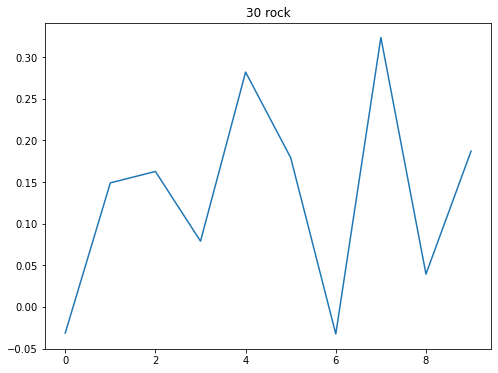

In [16]:
# Show the plot for one show
plt.plot(polarity_transcript[0])
plt.title(data_df['Show_name'].index[0])
plt.show()

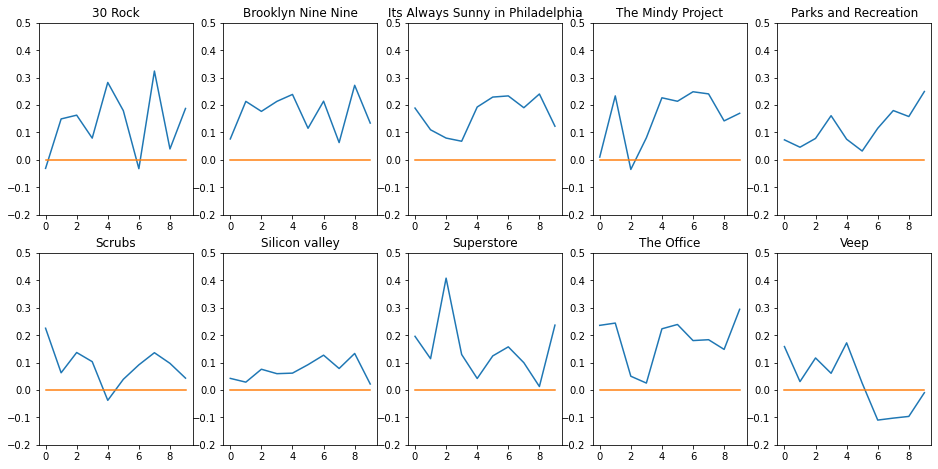

In [17]:
# Show the plot for all shows
plt.rcParams['figure.figsize'] = [16, 12]

for index, show in enumerate(data_df.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data_df['Show_name'][index])
    plt.ylim(ymin=-.2, ymax=.5)
    
plt.show()

# Analysis of results

The polarity over time for each script tells an interesting story
1. Brooklyn Nine Nine is the most positive show. It steers clear from negativity by a considerable margin compared to other shows.
2. The Mindy Project and Scrubs go below the line in terms of negativity (this makes sense because they are medical shows and it may involve concepts of emergency care/illness etc.) 30 Rock shouldnt go so low, but it does. Thats a little odd. 
3. Surprisingly, Veep is extremely negative- the entire 2nd half of the script involves negativity. This is sad (no pun intended) for a show that is primarily a comedy. Those who enjoy upbeat and lowstakes shows may not enjoy it.
4. I wanted to check if Superstore does anything differently compared to the other shows, because it was the latest of all these shows (pilot developed in 2015-16) and has one of the most self-contained and fantastic pilot episodes. It appears that Superstore achieves the highest level of positivity at one point (compared to all other shows), maybe this is a defining factor: a high peak followed by some shenanigans involving more ups and downs tells a more compelling story. 